In [1]:
from prody import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def new_dihedral(p):
    """Praxeolitic formula
    1 sqrt, 1 cross product
    https://stackoverflow.com/questions/20305272/dihedral-torsion-angle-from-four-points-in-cartesian-coordinates-in-python
    """
    p0 = p[0]
    p1 = p[1]
    p2 = p[2]
    p3 = p[3]

    b0 = -1.0*(p1 - p0)
    b1 = p2 - p1
    b2 = p3 - p2

    # normalize b1 so that it does not influence magnitude of vector
    # rejections that come next
    b1 /= np.linalg.norm(b1)

    # vector rejections
    # v = projection of b0 onto plane perpendicular to b1
    #   = b0 minus component that aligns with b1
    # w = projection of b2 onto plane perpendicular to b1
    #   = b2 minus component that aligns with b1
    v = b0 - np.dot(b0, b1)*b1
    w = b2 - np.dot(b2, b1)*b1

    # angle between v and w in a plane is the torsion angle
    # v and w may not be normalized but that's fine since tan is y/x
    x = np.dot(v, w)
    y = np.dot(np.cross(b1, v), w)
    return np.degrees(np.arctan2(y, x))

In [3]:
pdb = parsePDB("butane.pdb")
dcd = parseDCD("myfirstrun.dcd")
carbons = pdb.select('name C1 C2 C3 C4')
dcd.setAtoms(carbons)
dcd.setCoords(pdb)
dcd.superpose()
#carbons = pdb.select('name "C.*"')
#dcd.setAtoms(carbons)

@> 14 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> DCD file contains 1001 coordinate sets for 14 atoms.
@> DCD file was parsed in 0.00 seconds.
@> 0.18 MB parsed at input rate 91.63 MB/s.
@> 1001 coordinate sets parsed at input rate 500416 frame/s.
@> Superposition completed in 1.20 seconds.


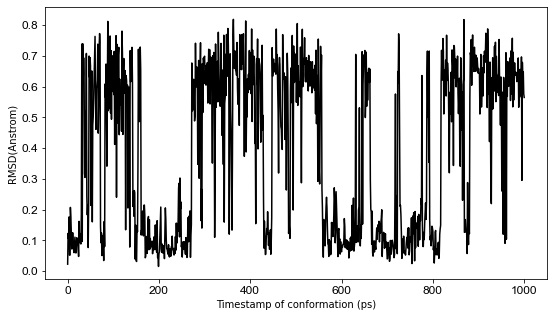

In [4]:
fig, ax = plt.subplots(figsize=(9,5))
ax.set_ylabel('RMSD(Anstrom)'); #set label names
ax.set_xlabel('Timestamp of conformation (ps)');
plt.yticks(fontsize=12, fontname = "Arial")
#plt.ylim(0, 1)
plt.xticks(fontsize=12, fontname = "Arial")
#plt.xticks([0, 3000, 6000, 9000, 13000], [0, 3, 6, 9, 13])
plt.plot(dcd.getRMSDs(), color='black')
plt.show()
plt.close()

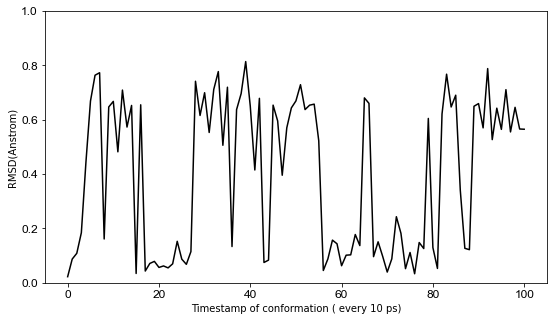

In [5]:
fig, ax = plt.subplots(figsize=(9,5))
ax.set_ylabel('RMSD(Anstrom)'); #set label names
ax.set_xlabel('Timestamp of conformation ( every 10 ps)');
plt.yticks(fontsize=12, fontname = "Arial")
plt.xticks(fontsize=12, fontname = "Arial")
plt.ylim(0, 1)
#plt.xticks([0, 30, 60, 90, 130], [0, 3, 6, 9, 13])
plt.plot(dcd.getRMSDs()[0:len(dcd):10], color='black')
plt.show()
plt.close()

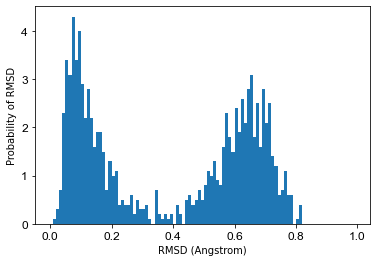

In [6]:
plt.hist(dcd.getRMSDs(), bins=np.arange(0,1,0.01), density=True);
plt.ylabel('Probability of RMSD'); #set label names
plt.xlabel('RMSD (Angstrom)');
plt.yticks(fontsize=12, fontname = "Arial");
plt.xticks(fontsize=12, fontname = "Arial");
plt.show()
plt.close()

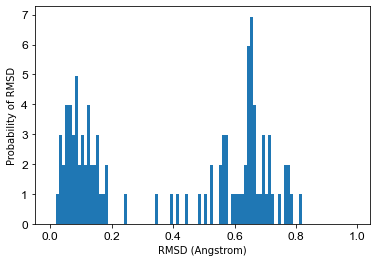

In [7]:
plt.hist(dcd.getRMSDs()[0:len(dcd):10], bins=np.arange(0,1,0.01), density=True);
plt.ylabel('Probability of RMSD'); #set label names
plt.xlabel('RMSD (Angstrom)');
plt.yticks(fontsize=12, fontname = "Arial");
plt.xticks(fontsize=12, fontname = "Arial");
plt.show()
plt.close()

In [8]:
dihedral_array = np.zeros((len(dcd)))
print(dihedral_array)
print(len(dcd))

[0. 0. 0. ... 0. 0. 0.]
1001


In [9]:
dcd[500].getCoords()[0]

array([-4.186777  ,  1.5099171 , -0.59294623], dtype=float32)

In [10]:
for i in range(len(dcd)):
    coords = dcd[i].getCoords()
    dihedral_array[i] = new_dihedral(coords)

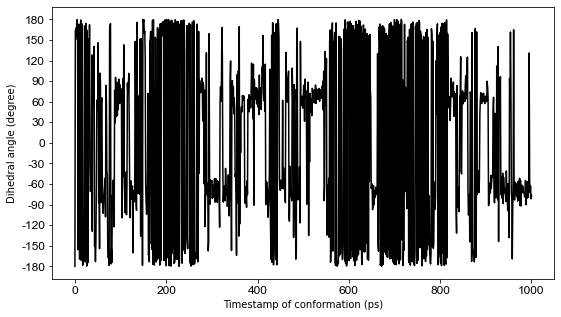

In [11]:
fig, ax = plt.subplots(figsize=(9,5))
ax.set_ylabel('Dihedral angle (degree)'); #set label names
ax.set_xlabel('Timestamp of conformation (ps)');
plt.yticks(fontsize=12, fontname = "Arial")
plt.xticks(fontsize=12, fontname = "Arial")
plt.yticks(list(range(-180, 181,30)),list(range(-180, 181,30)) )
#plt.xticks([0, 30, 60, 90, 130], [0, 3, 6, 9, 13])
plt.plot(dihedral_array, color='black')
plt.show()
plt.close()

In [12]:
dihedral_array_corr = np.zeros((len(dcd)))

In [13]:
dihedral_array_corr[np.where(dihedral_array < 0)[0]] = np.add(dihedral_array[np.where(dihedral_array < 0)[0]],360)
dihedral_array_corr[np.where(dihedral_array > 0)[0]] = dihedral_array[np.where(dihedral_array > 0)[0]]

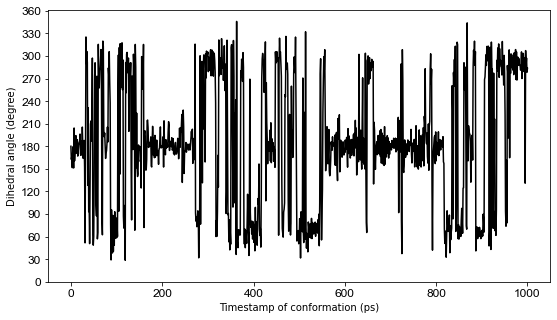

In [14]:
fig, ax = plt.subplots(figsize=(9,5))
ax.set_ylabel('Dihedral angle (degree)'); #set label names
ax.set_xlabel('Timestamp of conformation (ps)');
plt.yticks(fontsize=12, fontname = "Arial")
plt.xticks(fontsize=12, fontname = "Arial")
plt.ylim(0, 361)
plt.yticks(list(range(0, 361,30)),list(range(0, 361,30)) )
#plt.xticks([0, 3000, 6000, 9000, 13000], [0, 3, 6, 9, 13])
plt.plot(dihedral_array_corr, color='black')
plt.show()
plt.close()

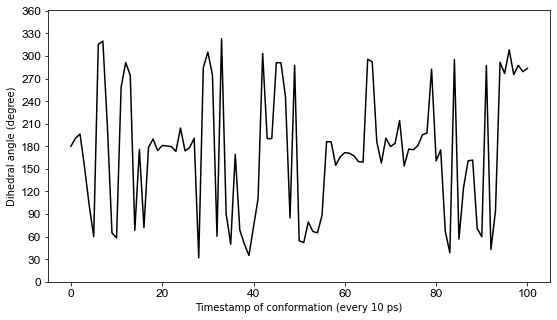

In [15]:
fig, ax = plt.subplots(figsize=(9,5))
ax.set_ylabel('Dihedral angle (degree)'); #set label names
ax.set_xlabel('Timestamp of conformation (every 10 ps)');
plt.yticks(fontsize=12, fontname = "Arial")
plt.xticks(fontsize=12, fontname = "Arial")
plt.ylim(0, 361)
plt.yticks(list(range(0, 361,30)),list(range(0, 361,30)) )
#plt.xticks([0, 30, 60, 90, 130], [0, 3, 6, 9, 13])
plt.plot(dihedral_array_corr[0:len(dcd):10], color='black')
plt.show()
plt.close()

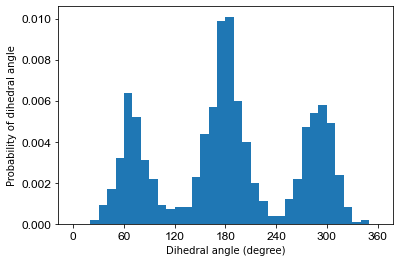

In [16]:
plt.hist(dihedral_array_corr, bins=np.arange(0,361,10), density=True);
plt.ylabel('Probability of dihedral angle'); #set label names
plt.xlabel('Dihedral angle (degree)');
plt.yticks(fontsize=12, fontname = "Arial");
plt.xticks(fontsize=12, fontname = "Arial");
plt.xticks(list(range(0, 361,60)))#, list(range(0, 360,30))))
plt.show()
plt.close()

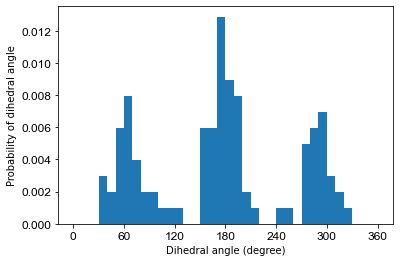

In [17]:
plt.hist(dihedral_array_corr[0:len(dcd):10], bins=np.arange(0,361,10), density=True);
plt.ylabel('Probability of dihedral angle'); #set label names
plt.xlabel('Dihedral angle (degree)');
plt.yticks(fontsize=12, fontname = "Arial");
plt.xticks(fontsize=12, fontname = "Arial");
plt.xticks(list(range(0, 361,60)))#, list(range(0, 360,30))))
plt.show()
plt.close()

C:\Users\tfguclu\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


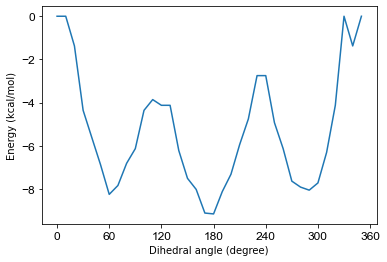

In [19]:
Temperature = 1000 #Kelvin

constant_for_E = -1.985*0.001*Temperature #kcal/mol

energy_DH_temp = np.histogram(dihedral_array_corr, bins=np.arange(0,361,10));

energy_DH = np.multiply(np.log(energy_DH_temp[0]), constant_for_E);
energy_DH[np.isinf(energy_DH)] = 0


plt.plot(energy_DH);
plt.ylabel('Energy (kcal/mol)'); #set label names
plt.xlabel('Dihedral angle (degree)');
plt.yticks(fontsize=12, fontname = "Arial");
plt.xticks(fontsize=12, fontname = "Arial");
plt.xticks(list(range(0, 37,6)), list(range(0, 361,60)))
plt.show()
plt.close()